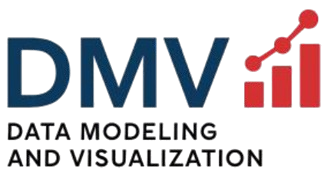

# **Week 6: Mosaic Plot, TreeMaps, Sunburst plots and Parallel Sets**

Let's import the necessary libraries

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#For interactive plots
!pip install squarify plotly
!pip install -U kaleido
import plotly
import plotly.express as px
import plotly.graph_objects as go
#For Mosaic Plots
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import rcParams
from itertools import product
import squarify

import warnings
warnings.filterwarnings('ignore')

Let's load the titanic dataset

In [115]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['embarked', 'sex', 'class'], inplace=True)  # Clean data for plotting
titanic['embarked'] = titanic['embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

In [116]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare     embarked  class  \
0         0       3    male  22.0      1      0   7.2500  Southampton  Third   
1         1       1  female  38.0      1      0  71.2833    Cherbourg  First   
2         1       3  female  26.0      0      0   7.9250  Southampton  Third   
3         1       1  female  35.0      1      0  53.1000  Southampton  First   
4         0       3    male  35.0      0      0   8.0500  Southampton  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# **1. Mosaic Plot**
**Description:**

A **Mosaic Plot** visualizes multivariate categorical data using tiled rectangles where area represents frequency.

## **Basic Mosaic Plot**

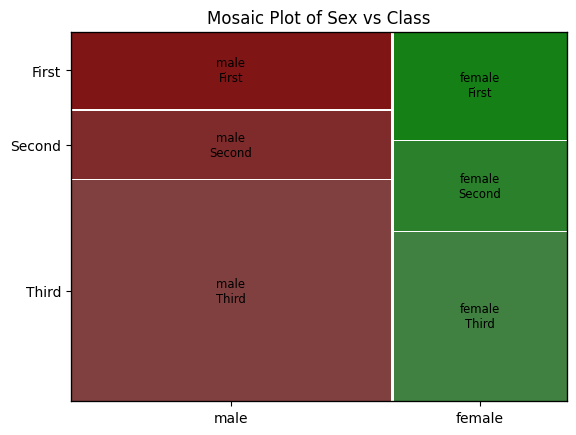

In [117]:
# Combine categories
titanic_mosaic_data = titanic.groupby(['sex', 'class']).size()
titanic_mosaic_data = titanic_mosaic_data[::-1]
mosaic(titanic_mosaic_data)
plt.title('Mosaic Plot of Sex vs Class')
plt.show()


## **Mosaic Plot with changed color**

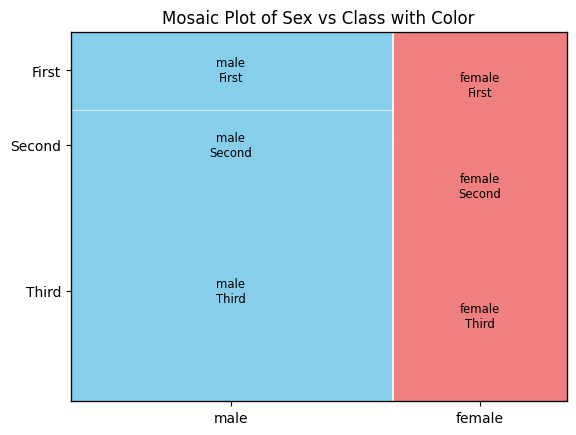

In [94]:
props = lambda key: {'color': 'skyblue' if key[0] == 'male' else 'lightcoral'}
mosaic(titanic_mosaic_data, properties=props)
plt.title('Mosaic Plot of Sex vs Class with Color')
plt.show()


# **2. TreeMap Plot**
**Description:**

**Treemaps** show hierarchical relationships as nested rectangles, using area to encode values

## **Basic Treemap (Passenger Class and Sex)**

In [118]:
#import plotly.express as px

grouped = titanic.groupby(['class', 'sex']).size().reset_index(name='count')

fig = px.treemap(grouped,
                 path=['class', 'sex'],
                 values='count',
                 color='count',
                 color_continuous_scale='peach')
fig.update_layout(title='Treemap: Class and Sex Distribution')
fig.show()


## **What if we change the order of the attributes?**

In [120]:
grouped = titanic.groupby(['class', 'sex']).size().reset_index(name='count')

fig = px.treemap(grouped, path=['sex','class'], values='count',
                 color='count', color_continuous_scale='peach')
fig.update_layout(title='Treemap: Sex and Class Distribution')
fig.show()

## **Variant of Treemaps: Add Embarked Location**

In [121]:
grouped = titanic.groupby(['embarked', 'class', 'sex']).size().reset_index(name='count')
fig = px.treemap(grouped, path=['class','embarked', 'sex'], values='count',
                 color='count', color_continuous_scale='haline')
fig.update_layout(title='Treemap: Class → Embarked → Sex')
fig.show()


## **What if we change the order of attributes, again?**

In [103]:
grouped = titanic.groupby(['embarked', 'class', 'sex']).size().reset_index(name='count')
fig = px.treemap(grouped, path=['embarked', 'class', 'sex'], values='count',
                 color='count', color_continuous_scale='haline')
fig.update_layout(title='Treemap: Embarked → Class → Sex')
fig.show()


## **Let's try another combination of attributes**

In [104]:
grouped = titanic.groupby(['embarked', 'class', 'sex']).size().reset_index(name='count')
fig = px.treemap(grouped, path=['sex','embarked', 'class'], values='count',
                 color='count', color_continuous_scale='haline')
fig.update_layout(title='Treemap: Sex → Embarked → Class')
fig.show()


### **Major differences between Mosaic Plots and Treemaps:**

| Feature      | Mosaic Plot                       | Treemap Plot                       |
| ------------ | --------------------------------- | ---------------------------------- |
| Data Type    | Categorical                       | Categorical (usually hierarchical) |
| Shape        | Rectangles split by tiles         | Nested rectangles                  |
| Area Meaning | Proportional frequency            | Proportional value/size            |
| Colors       | Customizable, based on category   | Continuous/Discrete Color Mapping  |
| Use Case     | Survey data, demographic insights | File systems, resource usage       |


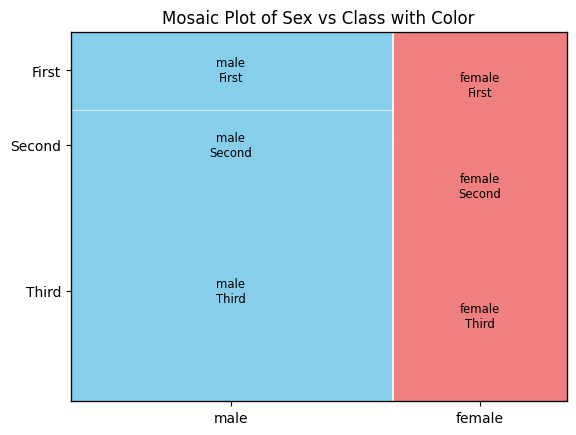

In [127]:
# Convert to string to avoid Categorical issues
grouped['class'] = grouped['class'].astype(str)
grouped['sex'] = grouped['sex'].astype(str)


props = lambda key: {'color': 'skyblue' if key[0] == 'male' else 'lightcoral'}
mosaic(titanic_mosaic_data, properties=props)
plt.title('Mosaic Plot of Sex vs Class with Color')
#plt.show()

# Plot Treemap with nested hierarchy (Class → Sex)
fig_px = px.treemap(grouped, path=['sex','class'], values='count', color='class',
                   color_discrete_sequence=px.colors.qualitative.Set2)
fig_px.update_layout(margin=dict(t=50, l=60, r=910, b=0), title='Treemap Plot: Sex → Class')

# Show both plots
#plt.tight_layout()
plt.show()
fig_px.show()


# **3. Sunburst Plot**
**Description:**

**Sunburst plots** are radial versions of treemaps, useful for visualizing hierarchies.

In [122]:
# Ensure all fields in path are strings (not Categorical dtype)
titanic_plot = titanic.copy()
titanic_plot['class'] = titanic_plot['class'].astype(str)
titanic_plot['sex'] = titanic_plot['sex'].astype(str)
#titanic_plot['embarked'] = titanic_plot['embarked'].astype(str)

# Sunburst Plot
fig = px.sunburst(
    titanic_plot,
    path=['class', 'sex'],
    color='class',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Sunburst Plot: Class → Sex'
)

# Save as interactive and static
fig.write_html("sunburst_plot.html")
fig.write_image("sunburst_plot.png", format='png', width=800, height=600)

fig.show()

# **Variation: Let's add Embarked information**

In [123]:
# Ensure all fields in path are strings (not Categorical dtype)
titanic_plot = titanic.copy()
titanic_plot['class'] = titanic_plot['class'].astype(str)
titanic_plot['sex'] = titanic_plot['sex'].astype(str)
titanic_plot['embarked'] = titanic_plot['embarked'].astype(str)

# Sunburst Plot
fig = px.sunburst(
    titanic_plot,
    path=['embarked', 'class', 'sex'],
    color='class',
    color_discrete_sequence=px.colors.qualitative.Pastel2,
    title='Sunburst Plot: Embarked → Class → Sex'
)

# Save as interactive and static
#fig.write_html("sunburst_plot.html")
#fig.write_image("sunburst_plot.png", format='png', width=800, height=600)

fig.show()



# **4. Parallel Sets Plot**
**Description:**

**Parallel Sets** are used to show flows between categorical dimensions like Sankey diagrams.

We'll use plotly’s Sankey diagram to simulate parallel sets.

In [79]:
# Prepare dimensions
from collections import Counter

dim1 = list(titanic['sex'])
dim2 = list(titanic['class'])
dim3 = list(titanic['survived'].astype(str))

labels = list(set(dim1 + dim2 + dim3))
label_map = {k: i for i, k in enumerate(labels)}

# Count connections
def get_links(source, target):
    pairs = list(zip(source, target))
    counter = Counter(pairs)
    return [
        {'source': label_map[s], 'target': label_map[t], 'value': v}
        for (s, t), v in counter.items()
    ]

# Three layers
links1 = get_links(dim1, dim2)
links2 = get_links(dim2, dim3)

# Combine
sankey_data = go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(
        source=[link['source'] for link in links1 + links2],
        target=[link['target'] for link in links1 + links2],
        value=[link['value'] for link in links1 + links2]
    )
)

fig = go.Figure(data=[sankey_data])
fig.update_layout(title_text="Parallel Sets: Sex → Class → Survived", font_size=12)
fig.show()


## **Colored plots are better!!**

In [124]:
import plotly.graph_objects as go
from collections import Counter
import pandas as pd

# Prepare dimensions
dim1 = list(titanic['sex'])
dim2 = list(titanic['class'])
dim3 = list(titanic['survived'].astype(str))

# Label mapping
labels = list(set(dim1 + dim2 + dim3))
label_map = {k: i for i, k in enumerate(labels)}

# Function to count links and assign color
def get_links(source, target, cmap):
    pairs = list(zip(source, target))
    counter = Counter(pairs)

    link_data = []
    for (s, t), v in counter.items():
        src_idx = label_map[s]
        tgt_idx = label_map[t]
        label_pair = f"{s} → {t}"
        color = cmap[label_pair] if label_pair in cmap else 'gray'

        link_data.append({
            'source': src_idx,
            'target': tgt_idx,
            'value': v,
            'color': color
        })
    return link_data

# Generate unique colors for each (source → target) pair
all_pairs = list(zip(dim1 + dim2, dim2 + dim3))
unique_pairs = list(set(f"{s} → {t}" for s, t in all_pairs))

# Create a color palette
import seaborn as sns
palette = sns.color_palette("Set3", len(unique_pairs)).as_hex()
color_map = {pair: color for pair, color in zip(unique_pairs, palette)}

# Generate links
links1 = get_links(dim1, dim2, color_map)
links2 = get_links(dim2, dim3, color_map)
all_links = links1 + links2

# Sankey diagram
sankey_data = go.Sankey(
    node=dict(
        label=labels,
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5)
    ),
    link=dict(
        source=[link['source'] for link in all_links],
        target=[link['target'] for link in all_links],
        value=[link['value'] for link in all_links],
        color=[link['color'] for link in all_links]
    )
)

fig = go.Figure(data=[sankey_data])
fig.update_layout(title_text="Parallel Sets: Sex → Class → Survived", font_size=12)
fig.show()


# **Parallel sets: Further example**

The Adult Census Income Dataset (from UCI Machine Learning Repository) is a real-world demographic and employment data. It contains rich categorical variables (like education, occupation, marital status, etc.). The target variable is income (<=50K or >50K), which we can treat like “outcome”. This dataset is suitable for discovering patterns of income distribution across demographic segments.

## **How Education and Occupation imnpacts the income?**

In [134]:
# Load directly from UCI repository (or use a local copy if preferred)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ["age", "workclass", "fnlwgt", "education", "education_num",
        "marital_status", "occupation", "relationship", "race", "sex",
        "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

# Read dataset
df = pd.read_csv(url, names=cols, na_values=" ?", skipinitialspace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Select only relevant categorical columns
df_subset = df[["education", "occupation", "income"]]

# Optional: clean up long category names
df_subset.columns = ["Education", "Occupation", "Income"]

# Plot Parallel Sets
fig = px.parallel_categories(df_subset,
                             dimensions=["Education", "Occupation", "Income"],
                             color=df_subset["Income"].apply(lambda x: 1 if x == ">50K" else 0),
                             color_continuous_scale=px.colors.sequential.RdBu,
                             labels={"Education": "Education",
                                     "Occupation": "Occupation",
                                     "Income": "Income"},
                             width=950, height=600)

fig.update_layout(title="Parallel Sets Visualization: UCI Adult Income Dataset",
                  font=dict(size=11),
                  margin=dict(l=60, r=60, t=60, b=40))

fig.show()


## **How Occupation and Marital Status is related to income?**

In [136]:
# Select only relevant categorical columns
df_subset = df[["occupation", "marital_status", "income"]]

# Optional: clean up long category names
df_subset.columns = ["Occupation", "Marital Status", "Income"]

# Plot Parallel Sets
fig = px.parallel_categories(df_subset,
                             dimensions=["Occupation", "Marital Status", "Income"],
                             color=df_subset["Income"].apply(lambda x: 1 if x == ">50K" else 0),
                             color_continuous_scale=px.colors.sequential.RdBu,
                             labels={"Occupation": "Occupation",
                                     "Marital Status": "Marital Status",
                                     "Income": "Income"},
                             width=950, height=600)

fig.update_layout(title="Parallel Sets Visualization: UCI Adult Income Dataset",
                  font=dict(size=11),
                  margin=dict(l=60, r=60, t=60, b=40))

fig.show()


## **What if we have more than TWO links?**

In [138]:
# Load directly from UCI repository (or use a local copy if preferred)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ["age", "workclass", "fnlwgt", "education", "education_num",
        "marital_status", "occupation", "relationship", "race", "sex",
        "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

# Read dataset
df = pd.read_csv(url, names=cols, na_values=" ?", skipinitialspace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Select only relevant categorical columns
df_subset = df[["education", "occupation", "marital_status", "income"]]

# Optional: clean up long category names
df_subset.columns = ["Education", "Occupation", "Marital Status", "Income"]

# Plot Parallel Sets
fig = px.parallel_categories(df_subset,
                             dimensions=["Education", "Occupation", "Marital Status", "Income"],
                             color=df_subset["Income"].apply(lambda x: 1 if x == ">50K" else 0),
                             color_continuous_scale=px.colors.sequential.RdBu,
                             labels={"Education": "Education",
                                     "Occupation": "Occupation",
                                     "Marital Status": "Marital Status",
                                     "Income": "Income"},
                             width=950, height=600)

fig.update_layout(title="Parallel Sets Visualization: UCI Adult Income Dataset",
                  font=dict(size=11),
                  margin=dict(l=60, r=60, t=60, b=40))

fig.show()


*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*